<a href="https://colab.research.google.com/github/favourphilic/Supervised_MachineLearning/blob/main/p1_Online_payment_fraud_detectionBALANCED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline 

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MyFolder/DataSet/kaggle/LinearRegression/credit card.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

* from the class distribuction above this is a case of imbalance data

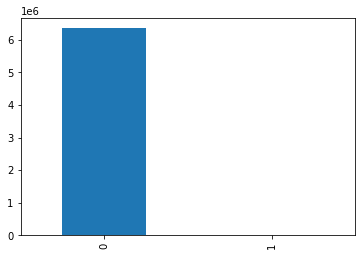

In [6]:
df['isFraud'].value_counts().plot.bar()

In [7]:
y= df['isFraud']
X=df.drop(['step','oldbalanceOrg','nameOrig', 'nameDest','isFlaggedFraud', 'isFraud'], axis=1)

In [8]:
X.shape, y.shape

((6362620, 5), (6362620,))

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['type']=le.fit_transform(X['type'])
X.head()

,type,amount,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,160296.36,0.0,0.0
1,3,1864.28,19384.72,0.0,0.0
2,4,181.00,0.00,0.0,0.0
3,1,181.00,0.00,21182.0,0.0
4,3,11668.14,29885.86,0.0,0.0


In [10]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 5), (1272524, 5), (5090096,), (1272524,))

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, counts of label '1': 6572
Before OverSampling, counts of label '0': 5083524 



In [12]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (10167048, 5)
After OverSampling, the shape of train_y: (10167048,) 

After OverSampling, counts of label '1': 5083524
After OverSampling, counts of label '0': 5083524


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [14]:


trf1 = ColumnTransformer([
    ('scale', StandardScaler(), slice(0,5))
])

trf2 = LogisticRegression()

In [15]:
## Pipeline

from sklearn.pipeline import Pipeline,make_pipeline
pipeLR =  Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipeLR.fit(X_train_res, y_train_res)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 5, None))])),
                ('trf2', LogisticRegression())])

In [16]:
y_pred = pipeLR.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [17]:
print('Training set score: ' + str(pipeLR.score(X_train_res,y_train_res)))
print('Test set score: ' + str(pipeLR.score(X_test,y_test)))

Training set score: 0.769111840526375
Test set score: 0.909664572141665


## Evaluation

In [18]:
#Let's take a look at the null accuracy
y_test.value_counts()

0    1270883
1       1641
Name: isFraud, dtype: int64

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270883
           1       0.01      0.62      0.02      1641

    accuracy                           0.91   1272524
   macro avg       0.50      0.76      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1156553  114330]
 [    624    1017]]

True Positives(TP) =  1017

True Negatives(TN) =  1156553

False Positives(FP) =  114330

False Negatives(FN) =  624


In [21]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

# KNN Classifier

In [22]:
trf1 = ColumnTransformer([
    ('scale', StandardScaler(), slice(0,5))
])

trf2 = KNeighborsClassifier(n_neighbors=3)

from sklearn.pipeline import Pipeline,make_pipeline
pipeKNN =  Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
pipeKNN.fit(X_train_res, y_train_res)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 5, None))])),
                ('trf2', KNeighborsClassifier(n_neighbors=3))])

In [23]:
y_predKNN3 = pipeKNN.predict(X_test)
y_predKNN3[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
print(classification_report(y_test, y_predKNN3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270883
           1       0.02      0.76      0.04      1641

    accuracy                           0.95   1272524
   macro avg       0.51      0.86      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



* Our KNN model has yielded an accuracy 0.95 greater than that of Logistic regression 0.91.
* Lets see if the model can also help reduce the number of False Positive

In [25]:
cmKNN3 = confusion_matrix(y_test, y_predKNN3)
print('Confusion matrix\n\n', cmKNN3)

print('\nTrue Positives(TP) = ', cmKNN3[1,1])

print('\nTrue Negatives(TN) = ', cmKNN3[0,0])

print('\nFalse Positives(FP) = ', cmKNN3[0,1])

print('\nFalse Negatives(FN) = ', cmKNN3[1,0])

Confusion matrix

 [[1210479   60404]
 [    393    1248]]

True Positives(TP) =  1248

True Negatives(TN) =  1210479

False Positives(FP) =  60404

False Negatives(FN) =  393


* Wow, the value of the false positive has greately reduced compared to the previous model.
* KNN model with n_neighbour been 3 is performing better than Logistic Regression

In [28]:
TP=cmKNN3[1,1]
FP=cmKNN3[0,1]
TN=cmKNN3[0,0]
FN=cmKNN3[1,0]

In [29]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9522


In [30]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0478


In [31]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))


Precision : 0.0202


In [32]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7605


In [33]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0475


In [34]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9525


## Probability

In [35]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_probKNN3 = pipeKNN.predict_proba(X_test)[0:10]

y_pred_probKNN3

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [36]:
# store the probabilities in dataframe

y_pred_probKNN3_df = pd.DataFrame(data=y_pred_probKNN3, columns=['Prob of - no fraud(0)', 'Prob of - Is fraud (1)'])

y_pred_probKNN3_df.head()

,Prob of - no fraud(0),Prob of - Is fraud (1)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.666667,0.333333
3,1.000000,0.000000
4,1.000000,0.000000


In [38]:
# print the first 10 predicted probabilities for class 1- Probability of fraud

pipeKNN.predict_proba(X_test)[0:10, 1]

array([0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [39]:
# store the predicted probabilities for class 1 - Probability of fraud

y_predKNN3_1 = pipeKNN.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

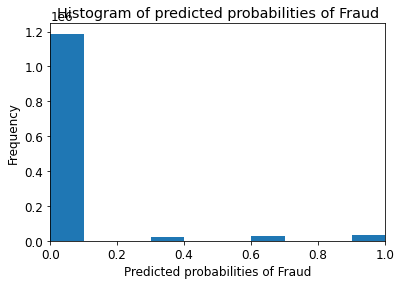

In [40]:
 #plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_predKNN3_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Fraud')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Fraud')
plt.ylabel('Frequency')

* We can see that the above histogram is positively skewed.
* The first column tell us that there are approximately 1.2 observations with 0 probability of fraud.
* There are few observations with probability > 0.5.
* So, these few observations predict that there will be malignant cancer.
* In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.